## ICSAP

**Internações por Condições Sensíveis à Atenção Primária** (ICSAP)

É um indicador de avaliação de saúde baseado em um conjunto de enfermidades que, se tratadas de forma eficaz na Atenção Primária e em tempo oportuno, reduzem o risco de internações hospitalares.

A utilização deste indicador permite que os gestores consigam melhorar o planejamento e a gestão dos serviços de saúde, já que possibilita avaliar o desempenho da Atenção Primária.

In [1]:
# coding: utf-8

"""
Mapeamento de Arquivos
"""

DF_ICSAP = '../data/raw/df_icsap.csv'
MU_IBGE = '../data/raw/mun_ibge.csv'


 | name | description | obs |  
 | --- | --- | --- | 
 | n.aih | Número da AIH |  | 
 | munres | Municipio de residencia (Código IBGE) |  | 
 | munint | Município de internaçao (Cod IBGE) |  | 
 | sexo | sexo do paciente | fem: 287.473 ~ masc: 270.435 | 
 | nasc | Data de nascimento |  | 
 | idade | Idade em anos | 120 valores distintos | 
 | fxetar.det | Faixa etária detalhada | Intervalo de <1ano até 80+ | 
 | fxetar5 | Faixa etária com 5 categorias | 17 valores distintos (intervalo de 0-4 até 80+) | 
 | csap | Condicao sensivel a atencao primaria (sim ou nao) | Todos as linhas são iguais ( sim ) | 
 | grupo | Grupo do CID (Diagnóstico) | 19 valores distintos (g01 a g19) | 
 | cid | CID-10 - Diagnóstico | 513 valores distintos | 
 | proc.rea | Procedimento realizado - Tabela SIGTAP |  | 
 | data.inter | Data da internação |  | 
 | data.saida | Data de saída/alta |  | 
 | cep | Cep de residencia |  | 
 | cnes | Codigo do estabelecimento de saude | 229 valores distintos | 
 | qnt | Quantidade | Todos as linhas são iguais ( 1 ) | 


 - Quantidade de Linhas: 557.908
 - Não existem valores faltantes

In [2]:
import pandas as pd

df = pd.read_csv(DF_ICSAP)

df.head(2)

,n.aih,munres,munint,sexo,nasc,idade,fxetar.det,fxetar5,csap,grupo,cid,proc.rea,data.inter,data.saida,cep,cnes,qnt
0,2314100004865,230440,230440,fem,2013-05-19,0,<1ano,0-4,sim,g01,B058,303010134,2014-01-14,2014-01-24,60870576,2785900,1
1,2314100004580,230440,230440,masc,2013-10-26,0,<1ano,0-4,sim,g01,A379,303010037,2014-01-16,2014-01-25,60870576,2785900,1


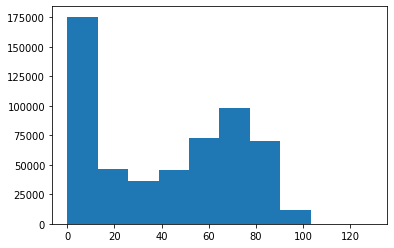

In [3]:
from matplotlib import pyplot as plt

plt.hist(df.idade)
plt.show()

In [24]:
ibge = pd.read_csv(MU_IBGE, sep=';', usecols=['codmu', 'nomemu'], index_col='codmu')
ibge.head(2)

,nomemu
codmu,
110001,Alta Floresta D'Oeste
110002,Ariquemes


In [29]:
def locIBGE(x):
    print(x)
    if(x):
        if(x in ibge.index.values):
            print(ibge.loc[x])
            return ibge.loc[x]
        else:
            x
            
df.munres.apply(locIBGE)

In [12]:

df = pd.merge(df, ibge, left_on='munres', right_on='codmu', how='left')
df.rename(columns={'nomemu':'municipio_res'}, inplace=True)
del df['codmu']
del df['munres']

df = pd.merge(df, ibge, left_on='munint', right_on='codmu', how='left')
df.rename(columns={'nomemu':'municipio_int'}, inplace=True)
del df['codmu']
del df['munint']

df.head(2)

,n.aih,sexo,nasc,idade,fxetar.det,fxetar5,csap,grupo,cid,proc.rea,data.inter,data.saida,cep,cnes,qnt,municipio_res,municipio_int
0,2314100004865,fem,2013-05-19,0,<1ano,0-4,sim,g01,B058,303010134,2014-01-14,2014-01-24,60870576,2785900,1,Fortaleza,Fortaleza
1,2314100004580,masc,2013-10-26,0,<1ano,0-4,sim,g01,A379,303010037,2014-01-16,2014-01-25,60870576,2785900,1,Fortaleza,Fortaleza


In [13]:
df.municipio_res.value_counts()


Fortaleza                166750
Caucaia                   17348
Russas                    15172
Brejo Santo               13198
Juazeiro do Norte         12016
                          ...  
Novo Hamburgo                 1
Oeiras do Par�                1
�gua Doce do Maranh�o         1
Paulino Neves                 1
S�o Miguel do Guam�           1
Name: municipio_res, Length: 710, dtype: int64